In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("student_clustering.csv")

In [3]:
class Kmeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters= n_clusters
        self.max_iter= max_iter
        self.centroids= None

    
    def fit_predict(self,x):
        rand_index=random.sample(range(0,x.shape[0]),self.n_clusters)
        self.centroids=x[rand_index]
        #print(self.centroids)
        for i in range(self.max_iter):
            cl_group=self.assign_clusters(x)
            old_centroids=self.centroids
            self.centroids=self.move_centroids(x,cl_group)
            if(old_centroids==self.centroids).all():
                break
        return cl_group
        

    def assign_clusters(self,x):
        cluster_group=[]
        distance=[]
        for row in x:
            for centroid in self.centroids:
                distance.append(np.sqrt(np.dot(row-centroid,row-centroid)))
                #distance.append(np.linalg.norm(row-centroid,axis=1))
            min_dist = min(distance)
            index_pos = distance.index(min_dist)
            cluster_group.append(index_pos)
            distance.clear()
        return np.array(cluster_group)
        

    def move_centroids(self,x,cluster_group):
        new_centroids=[]
        c_type=np.unique(cluster_group)
        for type in c_type:
            new_centroids.append(x[cluster_group==type].mean(axis=0))
        return np.array(new_centroids)
                
                
                
                
                


        

In [4]:
k = Kmeans(4,500)

In [5]:
y_means=k.fit_predict(df.values)

In [6]:
y_means

array([2, 3, 1, 1, 3, 3, 1, 0, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 3, 0, 3, 0, 3, 1, 1, 0, 3, 2, 3, 2, 1, 1, 2,
       0, 0, 1, 3, 0, 3, 2, 2, 0, 1, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0, 2, 0,
       1, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 2, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 3, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 0, 3, 3, 1, 0, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       2, 2, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 0,
       2, 1, 3, 0, 3, 1, 2, 0, 3, 1, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3,
       3, 0])

<Axes: xlabel='cgpa', ylabel='iq'>

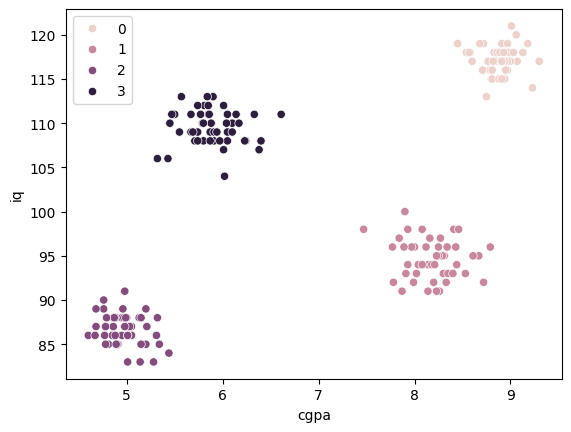

In [10]:
import seaborn as sns
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1],hue=y_means)